<a href="https://colab.research.google.com/github/JankovitsA/FAKT_MI/blob/main/FAKTprog_2_hazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder #számmá alakít
from sklearn.model_selection import train_test_split #tanuló-tesztelő adatbázisok
from sklearn.preprocessing import StandardScaler #normalizálás
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


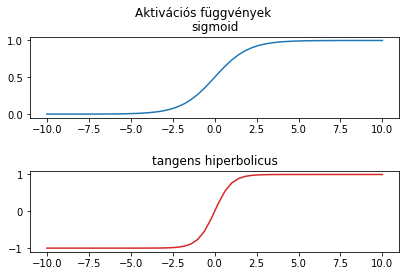

In [ ]:
##Ábrák kirajzolása (felhasznált: https://matplotlib.org/stable/tutorials/introductory/pyplot.html)


x=np.linspace(-10,10)
y=1/(1+np.exp(-x))
z=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Aktivációs függvények')


ax1.plot(x, y)
ax1.set_title("sigmoid")

ax2.plot(x, z, 'tab:red')
ax2.set_title("tangens hiperbolicus")

fig.tight_layout(pad=2)

In [153]:
##Intelligencia (?)
#az adatbázis a portugál iskolarendszerről készült, alább a változók a linkre kattintva láthatóak.
#Az excelt a gépemen formáztam, gyorsabbnak tűnk, mint átalakítani számmá az egyes i/H értékeket/ betűkombinációkat
from google.colab import files
uploaded = files.upload()

Saving data2.csv to data2 (1).csv


In [154]:
import io #Köszönöm Flórának az ötletet, majdnem a laptopom bánta, hogy nem tudtam megnyitni semmiképp...
data=pd.read_csv(io.BytesIO(uploaded['data2.csv']), sep=";")

In [155]:
dataframe.head #https://archive.ics.uci.edu/ml/datasets/student+performance
dataframe=data.copy()
dataframe=dataframe.drop('G1', axis=1)
dataframe=dataframe.drop('G2', axis=1)
dataframe=dataframe.drop('reason', axis=1)

In [156]:
dataframe.shape


(395, 30)

In [157]:
dataframe.isna().sum() #nincs hiányzó adat

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

In [158]:
#szöveg alapú változó számmá alakítása
labeler=LabelEncoder()
#labeler.fit(dataframe.thal)
#data.thal=labeler.transform(data.thal)
# dataframe.thal = labeler.fit_transform(...)

In [159]:
y_df=dataframe.G3
x_df = dataframe.copy()
x_df=x_df.drop('G3', axis = 1)

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x_df,y_df,test_size=0.1,shuffle=True) #shuffle: összekeveri az értékeket

In [161]:
normalizer=StandardScaler()
normalizer.fit(x_train) #y-t nem kell, mert 0 v. 1

StandardScaler()

In [ ]:
x_train=normalizer.transform(x_train)
pd.DataFrame(x_train) #így már dataframe

In [ ]:
pd.DataFrame(x_test)

In [164]:
##Architektúra létrehozása
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy

In [165]:
input = Input(shape=(x_train.shape[1]))
x = Dense(32, activation='relu')(input)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

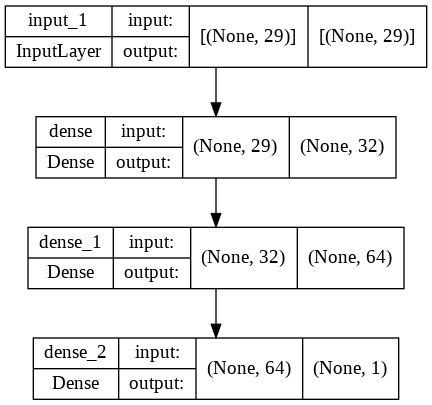

In [166]:
model = keras.Model(input, output)
plot_model(model, show_shapes=True)

In [169]:
model.compile(loss='binary_crossentropy', metrics=[BinaryAccuracy()])
model.fit(x=x_train, y=y_train, epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: -68389.3047 - binary_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: -70977.1016 - binary_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: -72948.8750 - binary_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: -74990.5547 - binary_accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: -77075.2812 - binary_accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: -79243.8906 - binary_accuracy: 0.0000e+00
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: -81407.7500 - binary_accuracy: 0.0000e+00
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: -83633.9297 - binary_accuracy: 0.0000e+00
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: -85831.

In [168]:
#ellenőrzés
model.evaluate(x=x_test, y=y_test)

2/2 [==============================] - 0s 12ms/step - loss: -51662.7266 - binary_accuracy: 0.0000e+00


[-51662.7265625, 0.0]